<a href="https://colab.research.google.com/github/saktiworkstation/road-to-ai-developer/blob/main/IMG_Processing_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Mengambil dataset MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
# Normalisasi data gambar dari 0-255 menjadi 0-1
x_train, x_test = x_train / 255.0, x_test / 255.0

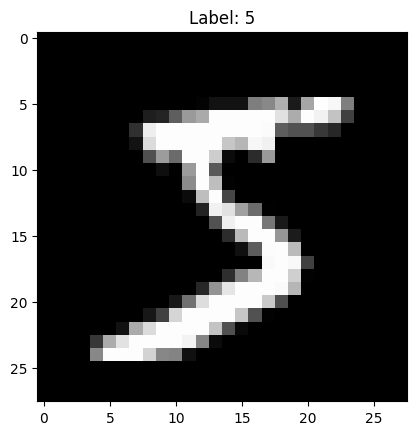

In [13]:
# Menampilkan salah satu gambar dari dataset untuk melihat bagaimana tampilannya
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [14]:
# Membangun model neural network menggunakan API Keras
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Meratakan input 28x28 piksel menjadi vektor
    layers.Dense(128, activation='relu'),  # Lapisan Dense dengan 128 neuron dan aktivasi ReLU
    layers.Dropout(0.2),  # Dropout untuk mencegah overfitting
    layers.Dense(10)  # Lapisan output dengan 10 neuron (untuk 10 kelas angka)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
# Kompilasi model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
# Melatih model dengan data latih
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9807 - loss: 0.0611
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9813 - loss: 0.0570
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9850 - loss: 0.0480
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9858 - loss: 0.0440
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9858 - loss: 0.0436


In [25]:
# Evaluasi model dengan data uji
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nAkurasi pada data uji: {test_acc}")

313/313 - 0s - 2ms/step - accuracy: 0.9777 - loss: 0.0768

Akurasi pada data uji: 0.9776999950408936


In [18]:
# Membuat prediksi pada data uji
probability_model = models.Sequential([model, layers.Softmax()])
predictions = probability_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


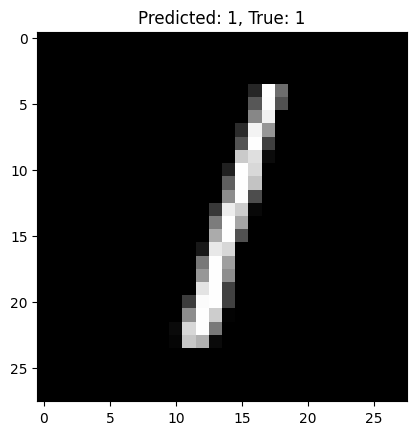

In [24]:
# Menampilkan hasil prediksi untuk gambar pertama dari dataset uji
predicted_label = np.argmax(predictions[2])
true_label = y_test[2]

plt.imshow(x_test[2], cmap='gray')
plt.title(f"Predicted: {predicted_label}, True: {true_label}")
plt.show()